In [3]:
import math, numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 

import sys
sys.path.insert(1, '_helperFuncs')
# self-written helper functions
import fourier_funcs as ff
import animation_funcs as af
import drawing_funcs as df

#for saving animations
import matplotlib.animation as animation   
Writer = animation.writers['ffmpeg']
writer = Writer(metadata=dict(artist='Ahish'), bitrate=1800)

In [4]:
# settings
sample_percent = 1 #percentage of original no. of points to be sampled
save_anim = 0 #if animation is to be saved

In [5]:
# gets the drawing input
df.drawingBoard().run()

In [6]:
# generate complex points sampled numpy array
sampled_points = np.asarray(df.points_touched)[::int(1/sample_percent)]

#calculates DFT
N = len(sampled_points)
points_fft = np.fft.fft(sampled_points, N)

#calculates the inverse fourier to verify
generated_function = ff.inv(points_fft, N)

#gets real and imaginary part of inverse function
real_pts = np.real(generated_function)
imag_pts = np.imag(generated_function)

<IPython.core.display.Javascript object>


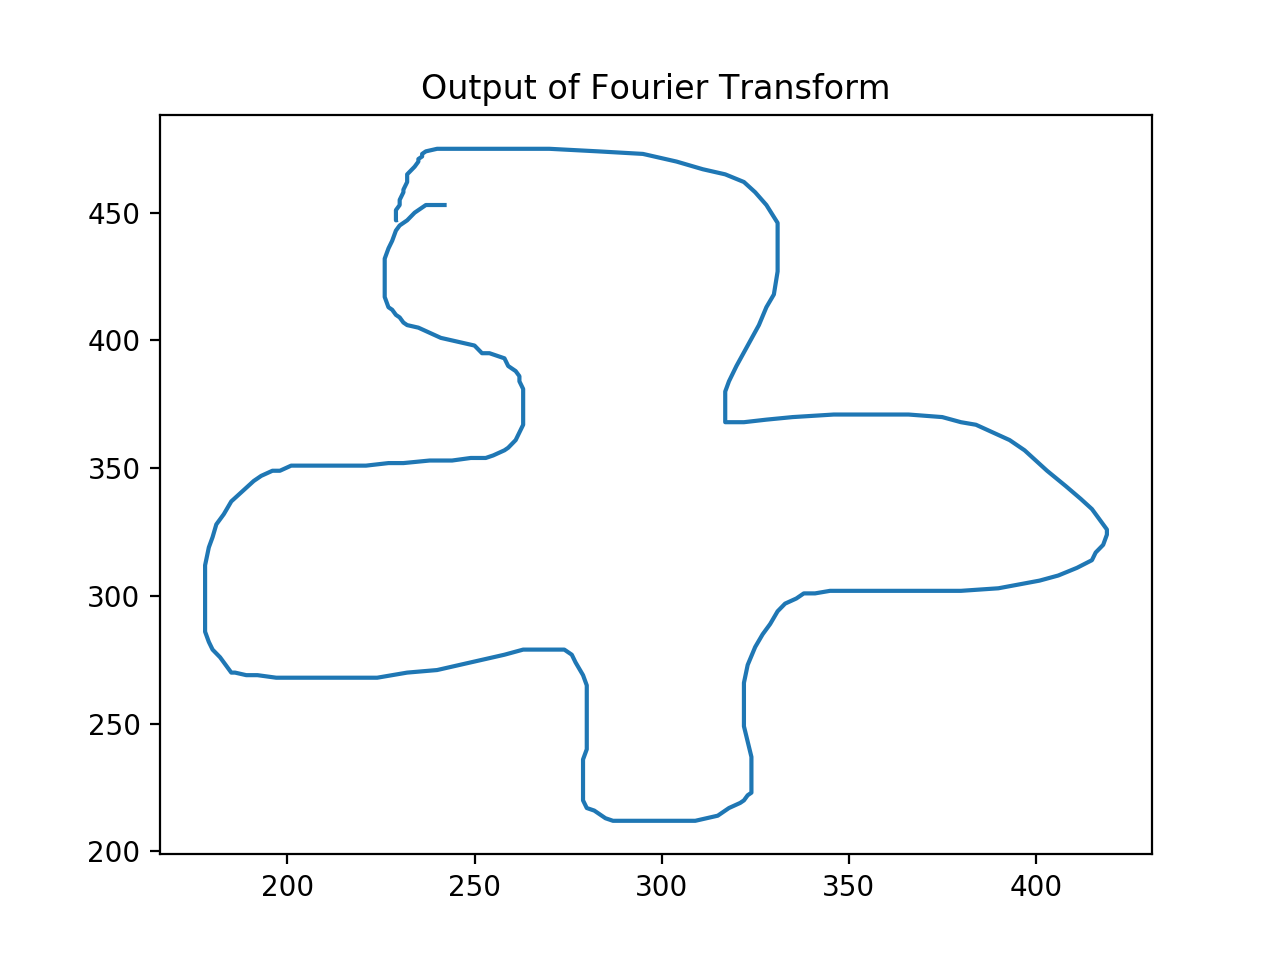

In [7]:
fig_dft_op = plt.figure("Output of 3D Sinusoidal Signal Generated")
plt.title("Output of Fourier Transform")
plt.plot(real_pts, imag_pts)
plt.show()

<IPython.core.display.Javascript object>


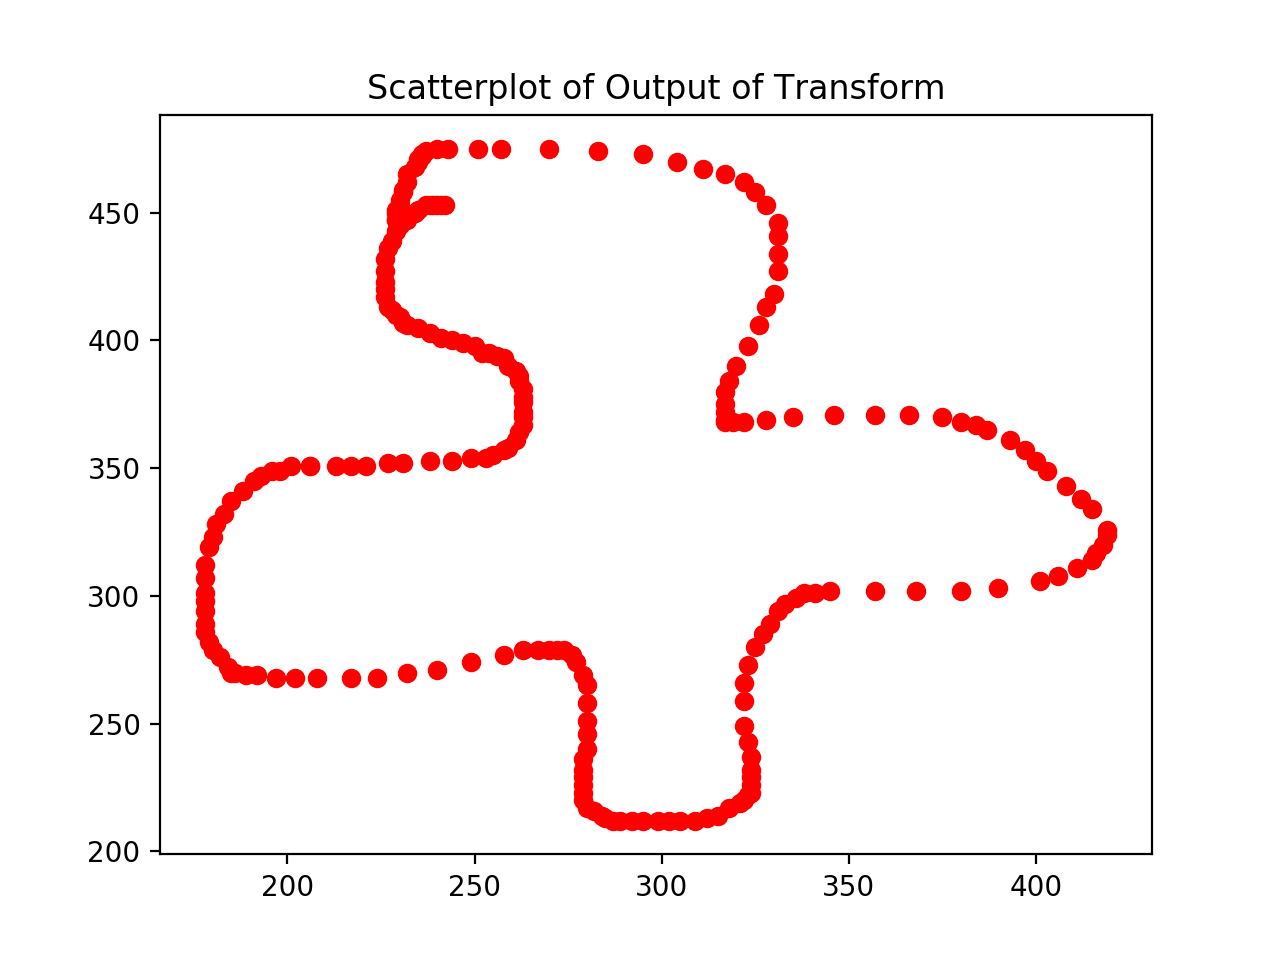

In [8]:
fig_gen_pts = plt.figure("Generated Points")
plt.scatter(real_pts, imag_pts, color='red')
plt.title("Scatterplot of Output of Transform")
plt.show()

<IPython.core.display.Javascript object>


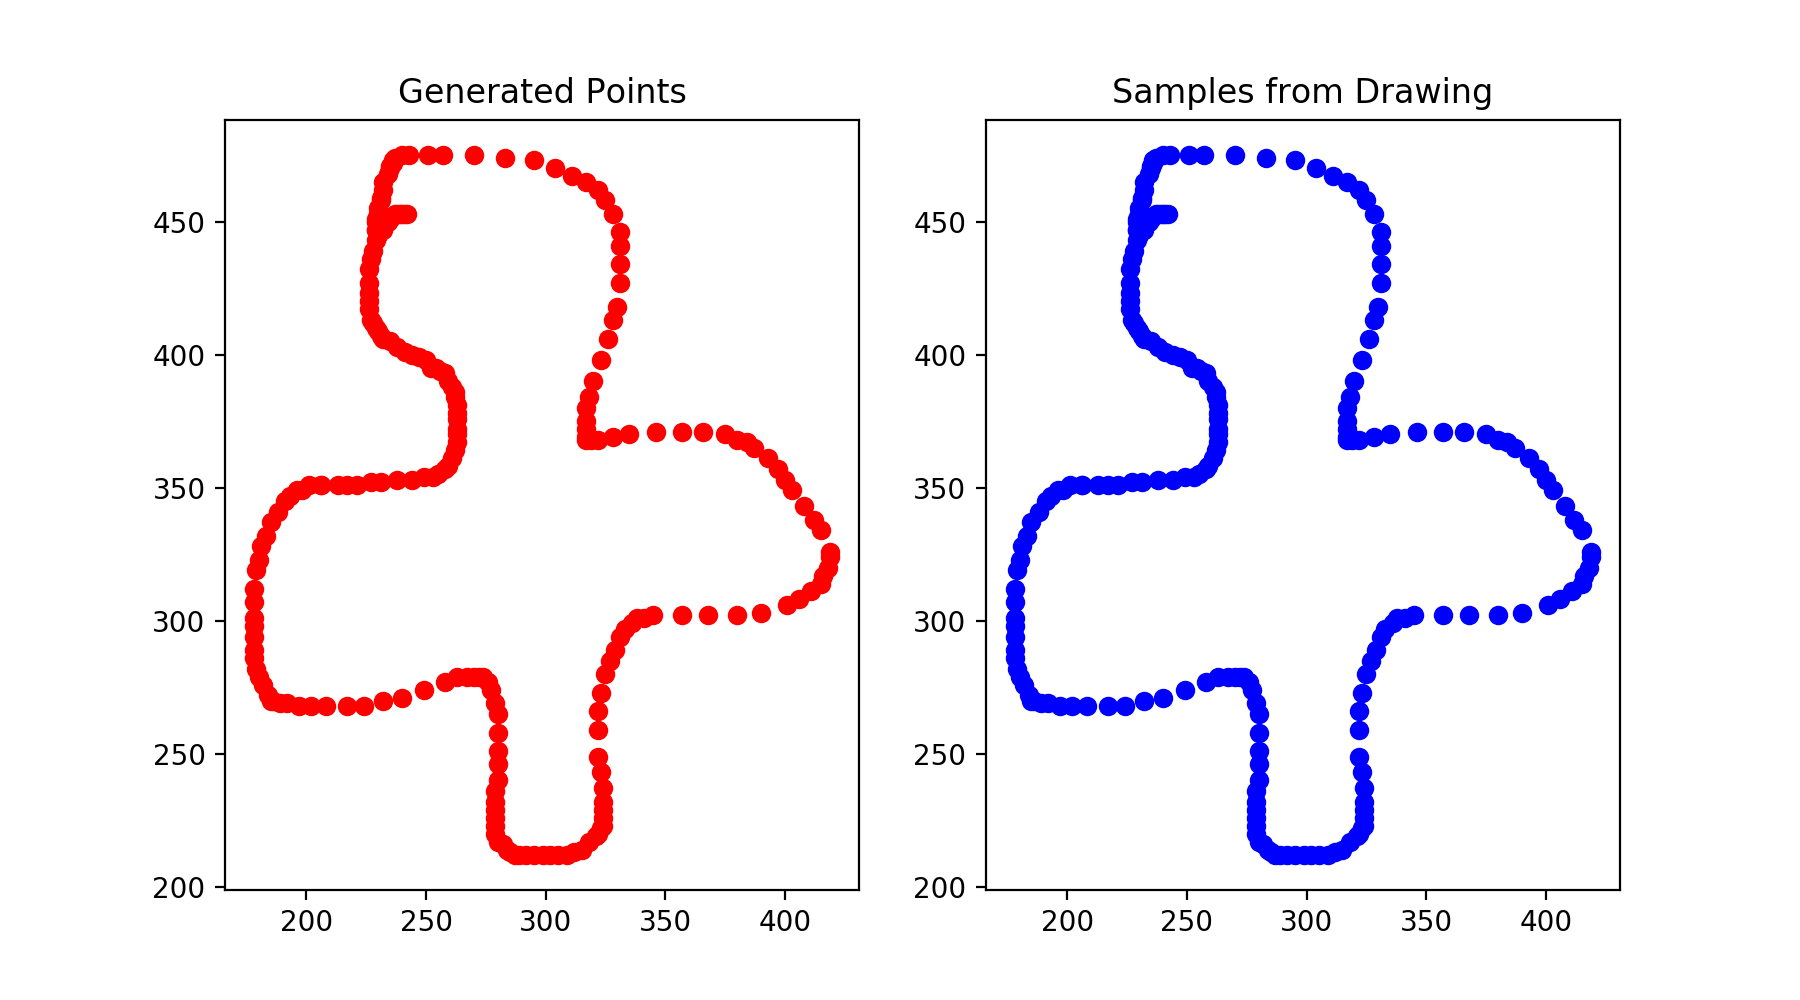

In [9]:
fig_cmp = plt.figure("Comparison of Generated Signal vs \
                     Original Drawing", figsize=(9,5))

plt.subplot(121)
plt.scatter(real_pts, imag_pts, color='red')
plt.title("Generated Points")

plt.subplot(122)
plt.scatter(np.real(sampled_points), np.imag(sampled_points), color='blue')
plt.title("Samples from Drawing")

plt.show()

In [10]:
# animation & drawing
abs_fft = np.absolute(points_fft)/N
phase_fft = np.angle(points_fft)
n_circles = len(points_fft)

<IPython.core.display.Javascript object>


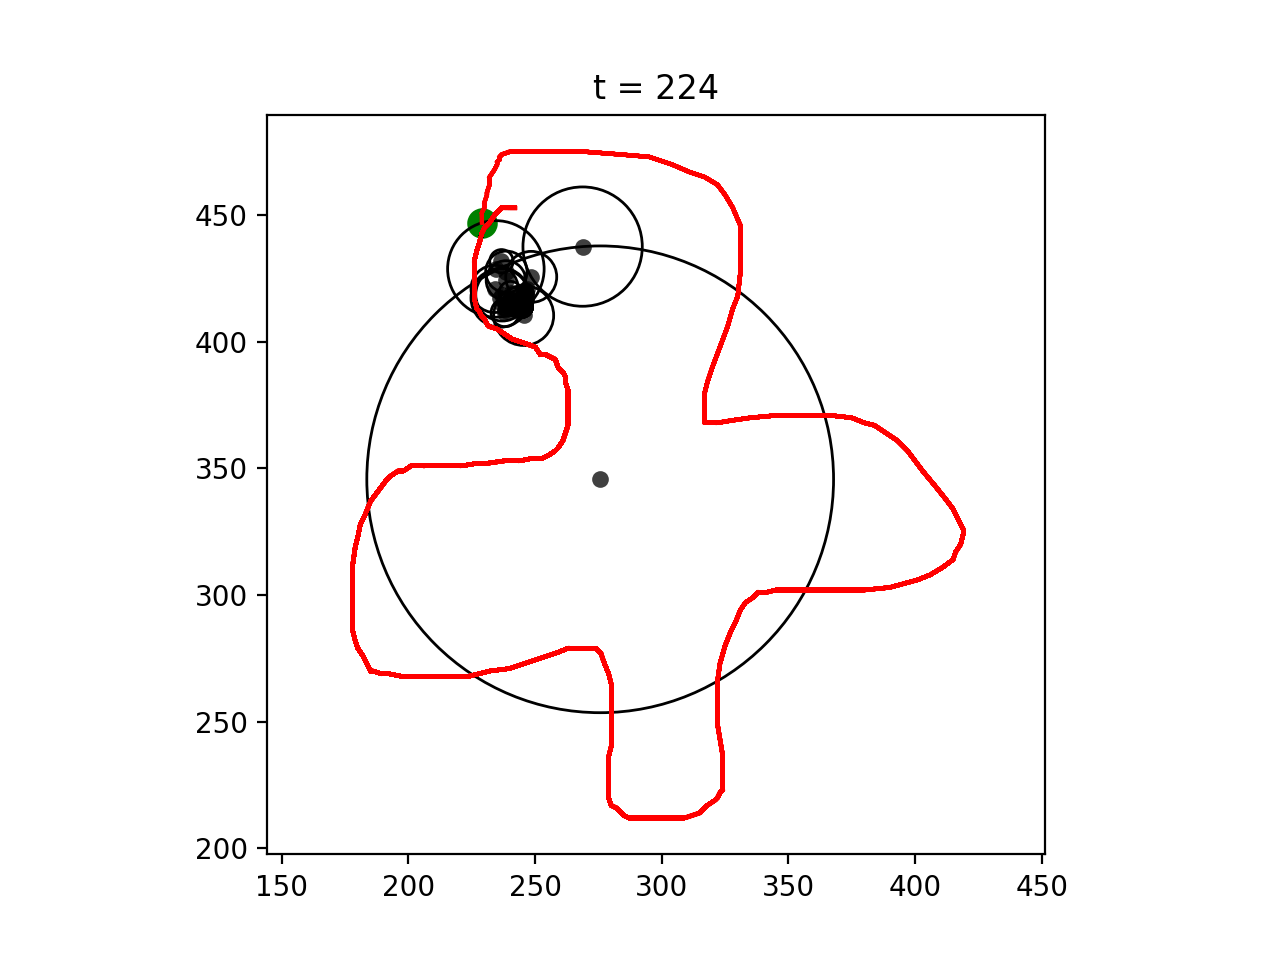

In [11]:
# Epicycle Drawing Animation
fig_epic = plt.figure("Epicyclic Drawing of Generated Function")
circles = af.get_init_vals(n_circles, abs_fft, phase_fft)
ax = plt.axes()

def init_epic():
    
    init_cs_pos = af.pos_at(0, abs_fft, phase_fft)
    for i in range(n_circles):
        if i:
            circles[i].center = init_cs_pos[i]
            ax.add_patch(circles[i])
    
    # for removing the scattered points after each frame
    global dot_sc
    global sc
    
    dot_sc = ax.scatter([x[0] for x in init_cs_pos[1:]], [x[1] for x in init_cs_pos[1:]], color='g')  
    sc = ax.scatter(real_pts[0], imag_pts[0], lw=5, color='g')
    
    return circles

def animate_epic(i):

    new_cs_pos = af.pos_at(i, abs_fft, phase_fft)
    for m in range(n_circles):
        if m:
            circles[m].center = new_cs_pos[m]

    # plotting generated function
    ax.plot(real_pts[:i+1], imag_pts[:i+1], color='r')
    ax.axis("scaled")

    #removing & changing location of scattered points
    global dot_sc
    global sc

    dot_sc.remove()
    sc.remove()
    dot_sc = ax.scatter([x[0] for x in new_cs_pos[1:]], [x[1] for x in new_cs_pos[1:]], color='black', lw=0.01, alpha=0.75)
    sc = ax.scatter(real_pts[i], imag_pts[i], lw=5, color='g')

    #shows frame number
    plt.title("t = "+str(i))

    return circles

anim_epic = animation.FuncAnimation(fig_epic, animate_epic, init_func=init_epic, frames=N, interval=20, blit=True, repeat=False)

plt.show()
        
        

In [ ]:
# override
# save_anim = 1

if save_anim:
    anim_epic.save("current.mp4", writer=writer)   

In [ ]:
#3D animation

from mpl_toolkits.mplot3d import Axes3D

fig_3d = plt.figure("3D Plot", figsize=(10,5))
ax_1 = fig_3d.add_subplot(131, projection='3d')
ax_2 = fig_3d.add_subplot(132, projection='3d')
ax_3 = fig_3d.add_subplot(133, projection='3d')

#first subplot
ax_1.view_init(8,-45)
ax_1.set_xlabel('t')
ax_1.set_ylim3d([0, 600])
ax_1.set_ylabel('X')
ax_1.set_zlim3d([0, 600])
ax_1.set_zlabel('Y')
ax_1.invert_xaxis()
ax_1.title.set_text("3D-View")

#second subplot
ax_2.view_init(0, 0)
ax_2.set_xlabel('t')
ax_2.set_ylim3d([0, 600])
ax_2.set_ylabel('X')
ax_2.set_zlim3d([0, 600])
ax_2.set_zlabel('Y')
ax_2.invert_xaxis()
ax_2.title.set_text("2D Projection\nIgnoring time")

#third subplot
ax_3.view_init(0,-90)
ax_3.set_xlabel('t')
ax_3.set_ylim3d([0, 600])
ax_3.set_ylabel('X')
ax_3.set_zlim3d([0, 600])
ax_3.set_zlabel('Y')
ax_3.invert_xaxis()
ax_3.title.set_text("2D Projection\nIgnoring Complex Part of DFT")
    
def init_3d():  
    return

def animate_3d(i):
    
    ax_1.plot(range(i), real_pts[:i], imag_pts[:i], color='b')
    ax_1.set_xlim3d([0.0, i])
    
    ax_2.plot(range(i), real_pts[:i], imag_pts[:i], color='b')
    ax_2.set_xlim3d([0.0, i])
    
    ax_3.plot(range(i), real_pts[:i], imag_pts[:i], color='b')
    ax_3.set_xlim3d([0.0, i])
    
    return   

anim_3d = animation.FuncAnimation(fig_3d, animate_3d, init_func=init_3d, frames=N, interval=20, blit=True, repeat=False)
plt.show()

In [ ]:
# override
# save_anim = 1

if save_anim:
    anim_3d.save("current-3D.mp4", writer=writer)